In [24]:
import numpy as np
import scipy as sp
from math import pi, tanh
from cmath import sqrt
from scipy.linalg import block_diag
import time
import matplotlib.pyplot as plt


In [15]:
D1=0.1
D1t=0.
D2=0.2
k0u=2.2
k0d=1.

In [16]:
s0=np.array([[1,0],[0,1]])
sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])
s_up=(sz+s0)/2
s_dn=(s0-sz)/2

T matrix with random disorder

In [19]:
Nrep=10
Nimp=20
L=10/D2
dl=L/Nimp
Z=0.
# Esw= np.linspace(-4.4,4.4,40)
Esw= np.linspace(0,4.4,100)
Esw=Esw[4:]

In [20]:
out_dir='Dis1d_data_files/'
f1='nu2_delta_D12_%.2f_%.2f_Z_%.2f_Ni_%d_L_%d' % (D1,D2,Z,Nimp,int(L*D1))
print(f1)
fname=out_dir+f1

nu2_delta_D12_0.10_0.20_Z_0.00_Ni_20_L_5


In [21]:
Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,s0)
Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,s0)
evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)
Tl=evecs_l
Tr=np.linalg.inv(evecs_l)
Tz=[[1-1j*Z,0,-1j*Z,0],\
    [0,1+1j*Z,0,-1j*Z],\
    [1j*Z,0,1+1j*Z,0],\
        [0,1j*Z,0,1-1j*Z]]
Tz=np.kron(Tz,s0)

In [22]:
Ree=np.zeros(len(Esw))
Reh=np.zeros(len(Esw))
vk= np.kron(s0,np.kron(sz,s0))
Hd= np.linalg.inv(vk)
t_timer=time.time()
np.random.seed()
# Dmat=(np.random.rand(Nimp,Nrep)-0.5)
Dmat=np.exp(1j*2*pi*np.random.rand(Nimp,Nrep))
D1s=D1*Dmat
D2s=D2*Dmat
x_imp_mat=np.random.rand(Nimp-1,Nrep)*L
for i_r in range(Nrep):
    print(' ',i_r,end=' \r')
    x_imp= np.sort(x_imp_mat[:,i_r])
    x_imp=np.concatenate(([0],x_imp,[L]))


    for i_E in range(len(Esw)):
        E=Esw[i_E]
        
        Tmat=np.dot(Tl,Tz)
        for i_n in range(Nimp):
            Ham=  - k0u* np.kron(sz,np.kron(s0,s_up))\
                    - k0d* np.kron(sz,np.kron(s0,s_dn))\
                    + np.real(D1s[i_n,i_r])*np.kron(sy,np.kron(sx,sy))\
                    + np.imag(D1s[i_n,i_r])*np.kron(sx,np.kron(sx,sy))\
                    + D1t*np.kron(sy,np.kron(s0,sy))\
                    + np.real(D2s[i_n,i_r])*np.kron(sy,np.kron(sy,s0))\
                    + np.imag(D2s[i_n,i_r])*np.kron(sx,np.kron(sy,s0))
            #             Tmat=np.dot(sp.linalg.expm(1j*np.dot(Hd,E*np.eye(8)-  Ham)*dl),Tmat)
            Tmat=np.dot(sp.linalg.expm(1j*np.dot(Hd,E*np.eye(8)-  Ham)*(x_imp[i_n+1]-x_imp[i_n])),Tmat)


        Tt=np.dot(Tr,Tmat)
        TLL=Tt[np.ix_([4,5,6,7],[4,5,6,7])]
        TLR=Tt[np.ix_([4,5,6,7],[0,1,2,3])]
        x= -sp.linalg.solve(TLL,TLR)
        Ree[i_E] = np.sum(np.abs(x[0,0:2])**2+np.abs(x[1,0:2])**2)
        Reh[i_E] = np.sum(np.abs(x[2,0:2])**2+np.abs(x[3,0:2])**2)

    np.savez(fname+'_%d.npz' % (i_r) , E_list=Esw, Ree=Ree , Reh=Reh)
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.0f " % (elapsed)+ "sec")

Finished, elapsed time = 18 sec


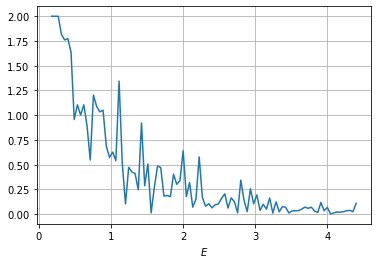

In [26]:
plt.figure()
plt.plot(Esw,Reh)
plt.grid()
# plt.ylim(0,1.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E$')
plt.show()